In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("D:\Intership_APSS\Concrete_Data_Yeh\Concrete_Data_Yeh.csv")

In [3]:
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [6]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("First Quantile of the columns: ",Q1,sep='\n')
print("Third Quantile of the columns: ",Q3,sep='\n')
print("Inter Quantile Range of the columns: ",IQR,sep='\n')

First Quantile of the columns: 
cement              192.375
slag                  0.000
flyash                0.000
water               164.900
superplasticizer      0.000
coarseaggregate     932.000
fineaggregate       730.950
age                   7.000
csMPa                23.710
Name: 0.25, dtype: float64
Third Quantile of the columns: 
cement               350.000
slag                 142.950
flyash               118.300
water                192.000
superplasticizer      10.200
coarseaggregate     1029.400
fineaggregate        824.000
age                   56.000
csMPa                 46.135
Name: 0.75, dtype: float64
Inter Quantile Range of the columns: 
cement              157.625
slag                142.950
flyash              118.300
water                27.100
superplasticizer     10.200
coarseaggregate      97.400
fineaggregate        93.050
age                  49.000
csMPa                22.425
dtype: float64


In [10]:
z = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [11]:
print(z)

cement               0
slag                 2
flyash               0
water                9
superplasticizer    10
coarseaggregate      0
fineaggregate        5
age                 59
csMPa                4
dtype: int64


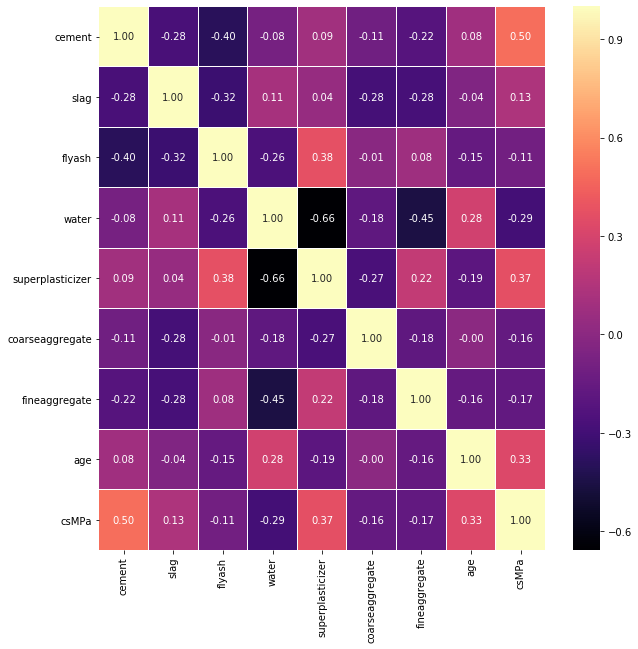

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

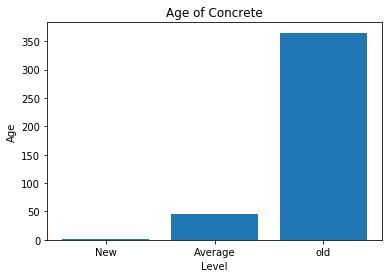

In [13]:
y = np.array([df["age"].min(),df["age"].mean(),df["age"].max()])
x = ["New","Average","old"]
plt.bar(x,y)
plt.title("Age of Concrete")
plt.xlabel("Level")
plt.ylabel("Age")
plt.show()

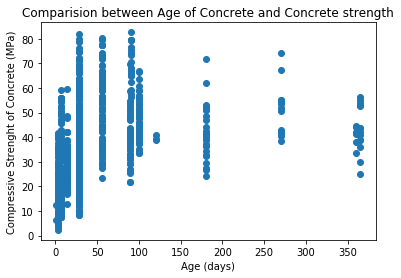

In [14]:
plt.scatter(df["age"],df.csMPa)
plt.title("Comparision between Age of Concrete and Concrete strength")
plt.xlabel("Age (days)")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

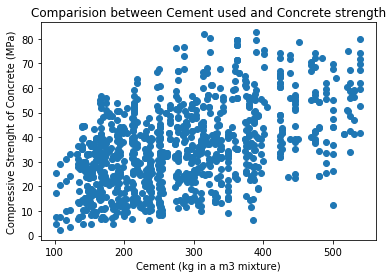

In [15]:
plt.scatter(df["cement"],df.csMPa)
plt.title("Comparision between Cement used and Concrete strength")
plt.xlabel("Cement (kg in a m3 mixture)")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

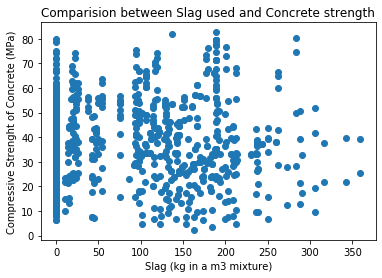

In [16]:
plt.scatter(df["slag"],df.csMPa)
plt.title("Comparision between Slag used and Concrete strength")
plt.xlabel("Slag (kg in a m3 mixture)")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

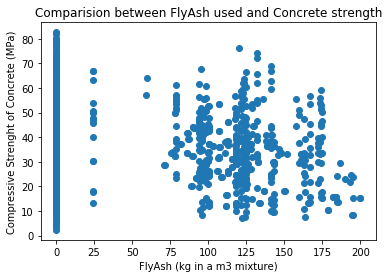

In [17]:
plt.scatter(df["flyash"],df.csMPa)
plt.title("Comparision between FlyAsh used and Concrete strength")
plt.xlabel("FlyAsh (kg in a m3 mixture)")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

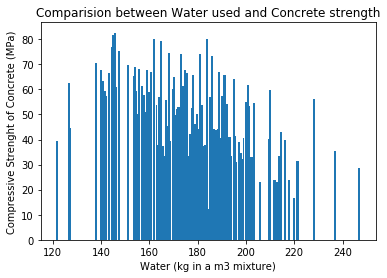

In [18]:
plt.bar(df["water"],df.csMPa)
plt.title("Comparision between Water used and Concrete strength")
plt.xlabel("Water (kg in a m3 mixture)")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

In [19]:
df["Water-Cement ratio"] = (df["water"]/df["cement"])

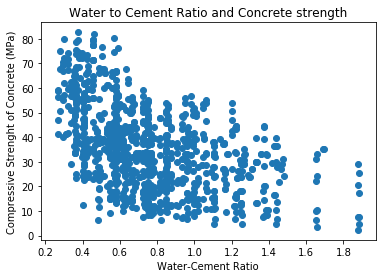

In [20]:
plt.scatter(df["Water-Cement ratio"],df.csMPa)
plt.title("Water to Cement Ratio and Concrete strength")
plt.xlabel("Water-Cement Ratio")
plt.ylabel("Compressive Strenght of Concrete (MPa)")
plt.show()

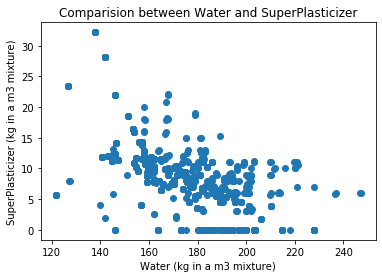

In [21]:
plt.scatter(df["water"],df.superplasticizer)
plt.title("Comparision between Water and SuperPlasticizer")
plt.xlabel("Water (kg in a m3 mixture)")
plt.ylabel("SuperPlasticizer (kg in a m3 mixture)")
plt.show()

## Splitting Data Set into test and train.

In [22]:
x = df.iloc[:,0:8]
y = df.iloc[:,8:9]

In [23]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

## Error Fucntion

In [24]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    data = {'Metrics' : ['R-squared','Mean Absolute Error:', 
                         'Mean Squared Error:', 
                         'Root Mean Squared Error:'], 'Values' : [round(r2,4),
                                                                  round(mean_absolute_error,4),
                                                                  round(mse,4),
                                                                  round(np.sqrt(mse),4)]}
    df = pd.DataFrame(data)
    print(df)

## LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R2 score of LinearRegression(TrainData):  0.6105238047649741


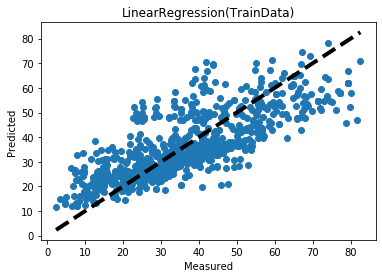

In [26]:
y_pred_lr_train = lr.predict(x_train)
print("R2 score of LinearRegression(TrainData): ", r2_score(y_train,y_pred_lr_train))

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_lr_train)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("LinearRegression(TrainData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

R2 score of LinearRegression(TestData):  0.6275531792314851


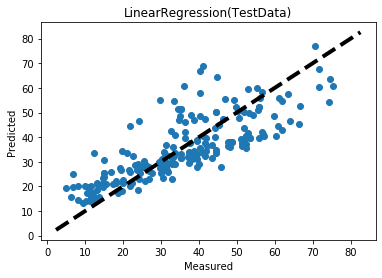

In [27]:
y_pred_lr = lr.predict(x_test)
print("R2 score of LinearRegression(TestData): ", r2_score(y_test,y_pred_lr))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("LinearRegression(TestData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
regression_results(y_test,y_pred_lr)

                    Metrics   Values
0                 R-squared   0.6276
1      Mean Absolute Error:   7.7456
2       Mean Squared Error:  95.9709
3  Root Mean Squared Error:   9.7965


In [29]:
regression_results(y_train,y_pred_lr_train)

                    Metrics    Values
0                 R-squared    0.6105
1      Mean Absolute Error:    8.3301
2       Mean Squared Error:  110.6449
3  Root Mean Squared Error:   10.5188


## DecisionTreeRegression

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

R2 score of DecisionTreeRegressor(TrainData):  0.9969388417779822


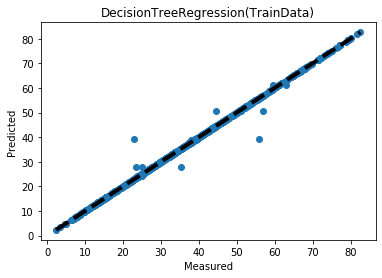

In [31]:
y_pred_dtr_train = dtr.predict(x_train)
print("R2 score of DecisionTreeRegressor(TrainData): ",r2_score(y_train,y_pred_dtr_train))

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_dtr_train)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("DecisionTreeRegression(TrainData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

R2 score of DecisionTreeRegressor(TestData):  0.8331981181150723


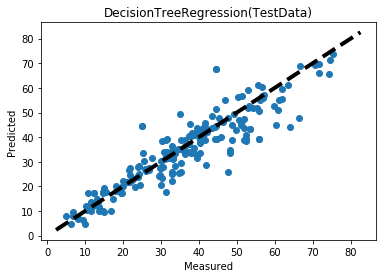

In [32]:
y_pred_dtr = dtr.predict(x_test)
print("R2 score of DecisionTreeRegressor(TestData): ",r2_score(y_test,y_pred_dtr))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_dtr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("DecisionTreeRegression(TestData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
regression_results(y_test,y_pred_dtr)

                    Metrics   Values
0                 R-squared   0.8332
1      Mean Absolute Error:   4.3961
2       Mean Squared Error:  42.9810
3  Root Mean Squared Error:   6.5560


In [34]:
regression_results(y_train,y_pred_dtr_train)

                    Metrics  Values
0                 R-squared  0.9969
1      Mean Absolute Error:  0.0812
2       Mean Squared Error:  0.8696
3  Root Mean Squared Error:  0.9325


## RandomForestRegression

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

R2 score of DecisionTreeRegressor(TrainData):  0.9861159423776036


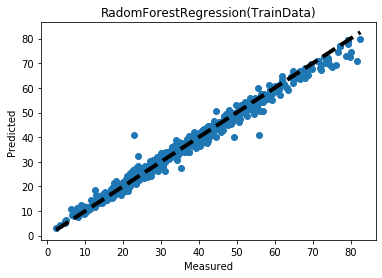

In [36]:
y_pred_rfr_train = rfr.predict(x_train)
print("R2 score of DecisionTreeRegressor(TrainData): ",r2_score(y_train,y_pred_rfr_train))

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_rfr_train)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("RadomForestRegression(TrainData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

R2 score of DecisionTreeRegressor(TestData):  0.882611810388571


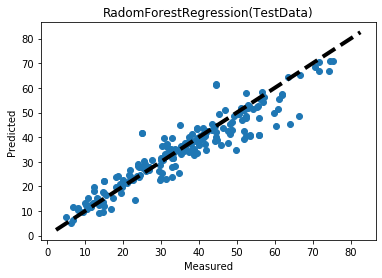

In [37]:
y_pred_rfr = rfr.predict(x_test)
print("R2 score of DecisionTreeRegressor(TestData): ",r2_score(y_test,y_pred_rfr))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rfr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("RadomForestRegression(TestData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [38]:
regression_results(y_test,y_pred_rfr)

                    Metrics   Values
0                 R-squared   0.8826
1      Mean Absolute Error:   3.7422
2       Mean Squared Error:  30.2482
3  Root Mean Squared Error:   5.4998


In [39]:
regression_results(y_train,y_pred_rfr_train)

                    Metrics  Values
0                 R-squared  0.9861
1      Mean Absolute Error:  1.2997
2       Mean Squared Error:  3.9443
3  Root Mean Squared Error:  1.9860


## PolynomialRegression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R2 score of PolynomialRegression(TrainData):  0.9823193435013505


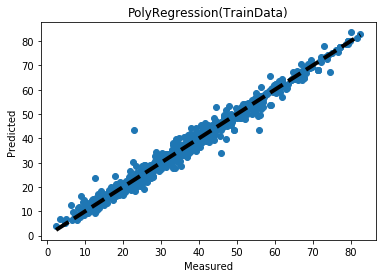

In [41]:
y_pred_poly_train = pol_reg.predict(poly_reg.fit_transform(x_train))
print("R2 score of PolynomialRegression(TrainData): ", r2_score(y_train,y_pred_poly_train))

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_poly_train)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("PolyRegression(TrainData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

R2 score of PolynomialRegression(TestData):  0.9997710602812335


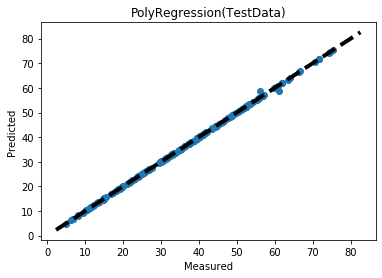

In [42]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_test)

y_pred_poly = pol_reg.predict(poly_reg.fit_transform(x_test))
print("R2 score of PolynomialRegression(TestData): ", r2_score(y_test,y_pred_poly))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_poly)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("PolyRegression(TestData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
regression_results(y_test,y_pred_poly)

                    Metrics  Values
0                 R-squared  0.9998
1      Mean Absolute Error:  0.0239
2       Mean Squared Error:  0.0590
3  Root Mean Squared Error:  0.2429


In [44]:
regression_results(y_train,y_pred_poly_train)

                    Metrics  Values
0                 R-squared  0.9823
1      Mean Absolute Error:  1.4639
2       Mean Squared Error:  5.0228
3  Root Mean Squared Error:  2.2412


## SupportVectorRegression

In [45]:
from sklearn.svm import SVR
svr = SVR(kernel = "poly", gamma = "scale", C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

R2 score of SupportVectorRegression(TrainData):  0.4945328736610848


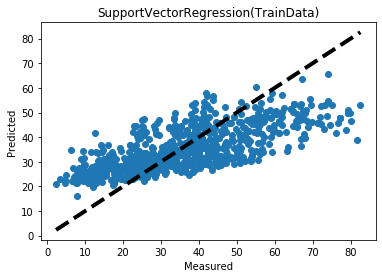

In [46]:
y_pred_svr_train = svr.predict(x_train)
print("R2 score of SupportVectorRegression(TrainData): ",r2_score(y_train,y_pred_svr_train))

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_svr_train)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("SupportVectorRegression(TrainData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


R2 score of SupportVectorRegression(TestData):  0.4735528970851868


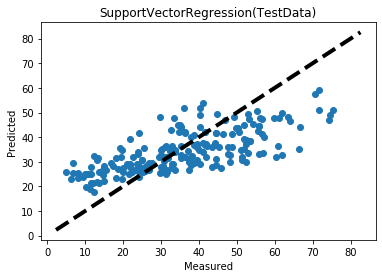

In [47]:
y_pred_svr = svr.predict(x_test)
print("R2 score of SupportVectorRegression(TestData): ",r2_score(y_test,y_pred_svr))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_svr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title("SupportVectorRegression(TestData)")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [48]:
regression_results(y_test,y_pred_svr)

                    Metrics    Values
0                 R-squared    0.4736
1      Mean Absolute Error:    9.5566
2       Mean Squared Error:  135.6533
3  Root Mean Squared Error:   11.6470


In [49]:
regression_results(y_train,y_pred_svr_train)

                    Metrics    Values
0                 R-squared    0.4945
1      Mean Absolute Error:    9.5552
2       Mean Squared Error:  143.5963
3  Root Mean Squared Error:   11.9832


## Comparing the Algorithms R2 Score

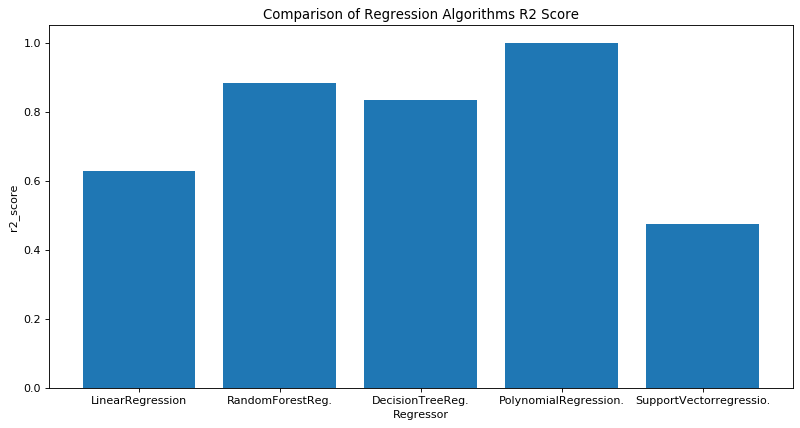

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([r2_score(y_test,y_pred_lr),r2_score(y_test,y_pred_rfr),r2_score(y_test,y_pred_dtr),r2_score(y_test,y_pred_poly),r2_score(y_test,y_pred_svr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.","PolynomialRegression.","SupportVectorregressio."]

plt.bar(x,y)
plt.title("Comparison of Regression Algorithms R2 Score")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

## Comparing the Algorithms Errors

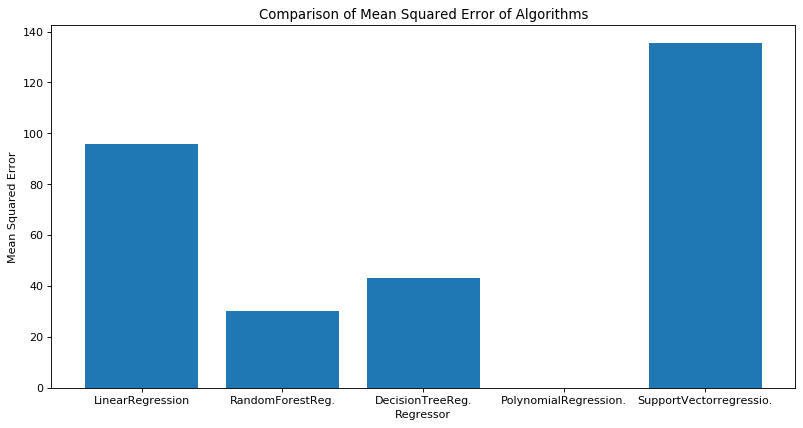

In [51]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([metrics.mean_squared_error(y_test, y_pred_lr),
             metrics.mean_squared_error(y_test, y_pred_rfr),
             metrics.mean_squared_error(y_test, y_pred_dtr),
             metrics.mean_squared_error(y_test, y_pred_poly),
             metrics.mean_squared_error(y_test, y_pred_svr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.","PolynomialRegression.","SupportVectorregressio."]

plt.bar(x,y)
plt.title("Comparison of Mean Squared Error of Algorithms")
plt.xlabel("Regressor")
plt.ylabel("Mean Squared Error")
plt.show()

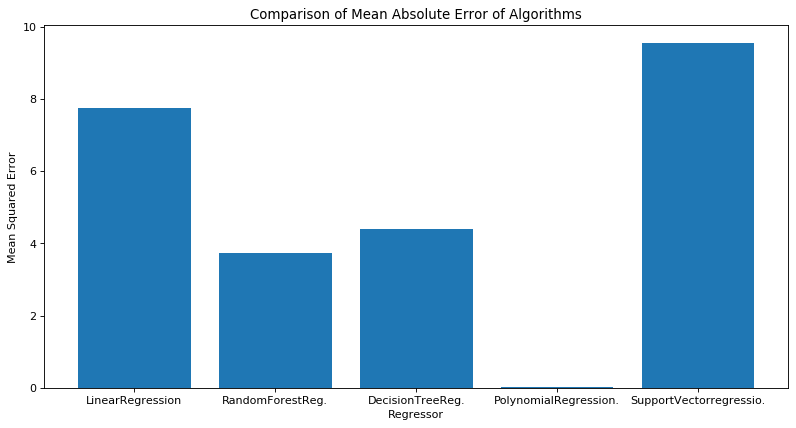

In [52]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([metrics.mean_absolute_error(y_test, y_pred_lr),
             metrics.mean_absolute_error(y_test, y_pred_rfr),
             metrics.mean_absolute_error(y_test, y_pred_dtr),
             metrics.mean_absolute_error(y_test, y_pred_poly),
             metrics.mean_absolute_error(y_test, y_pred_svr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.","PolynomialRegression.","SupportVectorregressio."]

plt.bar(x,y)
plt.title("Comparison of Mean Absolute Error of Algorithms")
plt.xlabel("Regressor")
plt.ylabel("Mean Squared Error")
plt.show()

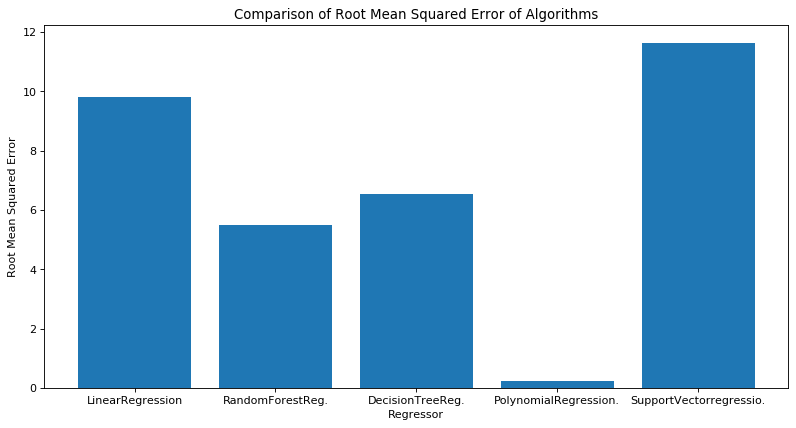

In [53]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)),
             np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)),
             np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)),
             np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.","PolynomialRegression.","SupportVectorregressio."]

plt.bar(x,y)
plt.title("Comparison of Root Mean Squared Error of Algorithms")
plt.xlabel("Regressor")
plt.ylabel("Root Mean Squared Error")
plt.show()

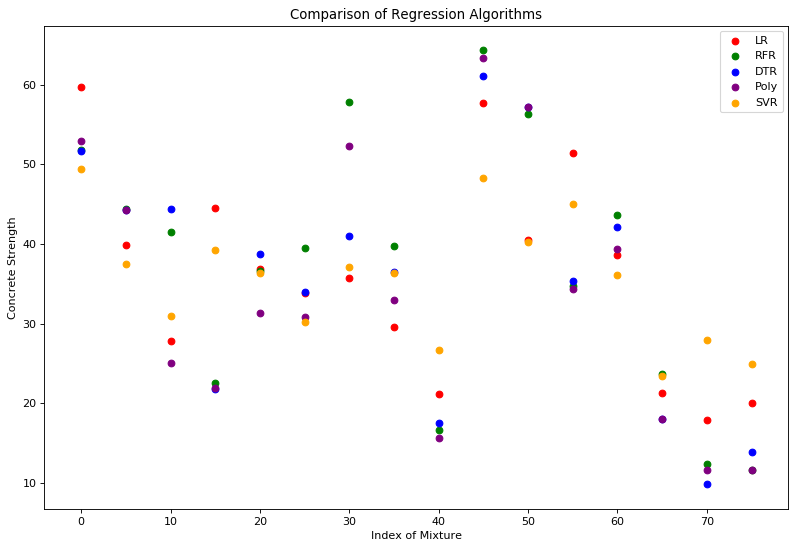

In [54]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
red = plt.scatter(np.arange(0,80,5),y_pred_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_pred_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_pred_dtr[0:80:5],color = "blue")
purple = plt.scatter(np.arange(0,80,5),y_pred_poly[0:80:5],color = "purple")
orange = plt.scatter(np.arange(0,80,5),y_pred_svr[0:80:5],color = "orange")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Mixture")
plt.ylabel("Concrete Strength")
plt.legend((red,green,blue,purple,orange),('LR', 'RFR', 'DTR', 'Poly', 'SVR'))
plt.show()

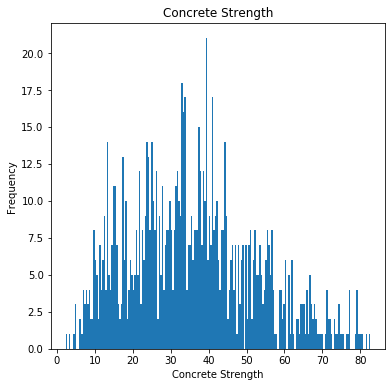

In [55]:
df["csMPa"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Concrete Strength")
plt.xlabel("Concrete Strength")
plt.ylabel("Frequency")
plt.show()

## Clustering

In [56]:
df = pd.read_csv("D:\Intership_APSS\Concrete_Data_Yeh\Concrete_Data_Yeh.csv")
df = (df- np.min(df))/(np.max(df)-np.min(df))
y = df.csMPa 
x = df.drop(["csMPa"],axis=1)

In [57]:
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860
5,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.190667,0.244505,0.556871
6,0.634703,0.264329,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.515386
7,0.634703,0.264329,0.0,0.848243,0.00000,0.380814,0.000000,0.074176,0.425065
8,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.190667,0.074176,0.542170
9,0.851598,0.000000,0.0,0.848243,0.00000,0.380814,0.000000,0.074176,0.460446


In [58]:
# for data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whitten = normalize
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(1030,)
dictionary = {"x":x_pca,"y":y}
data = pd.DataFrame(dictionary)
print("data:")
print(data.head())
print("\ndf:")
print(df.head())

data:
          x         y
0 -1.033481  0.967485
1 -1.029862  0.741996
2 -1.610073  0.472655
3 -1.692794  0.482372
4 -0.967248  0.522860

df:
     cement      slag  flyash     water  superplasticizer  coarseaggregate  \
0  1.000000  0.000000     0.0  0.321086           0.07764         0.694767   
1  1.000000  0.000000     0.0  0.321086           0.07764         0.738372   
2  0.526256  0.396494     0.0  0.848243           0.00000         0.380814   
3  0.526256  0.396494     0.0  0.848243           0.00000         0.380814   
4  0.220548  0.368392     0.0  0.560703           0.00000         0.515698   

   fineaggregate       age     csMPa  
0       0.205720  0.074176  0.967485  
1       0.205720  0.074176  0.741996  
2       0.000000  0.739011  0.472655  
3       0.000000  1.000000  0.482372  
4       0.580783  0.986264  0.522860  


## KMeans

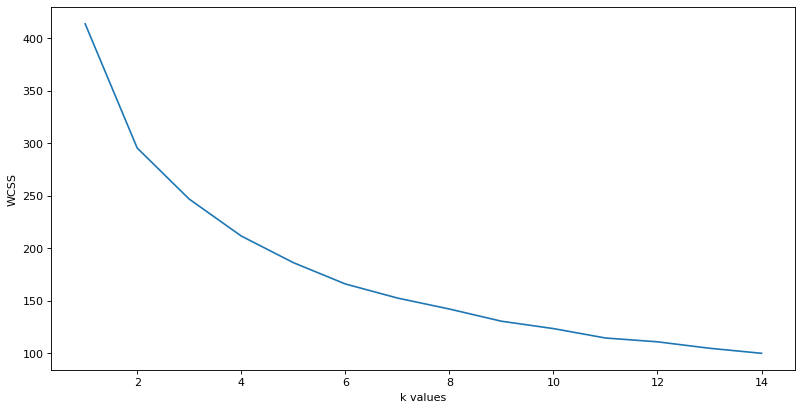

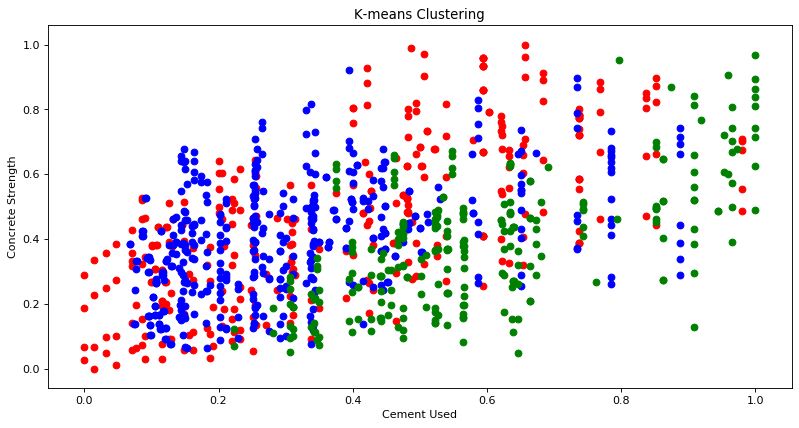

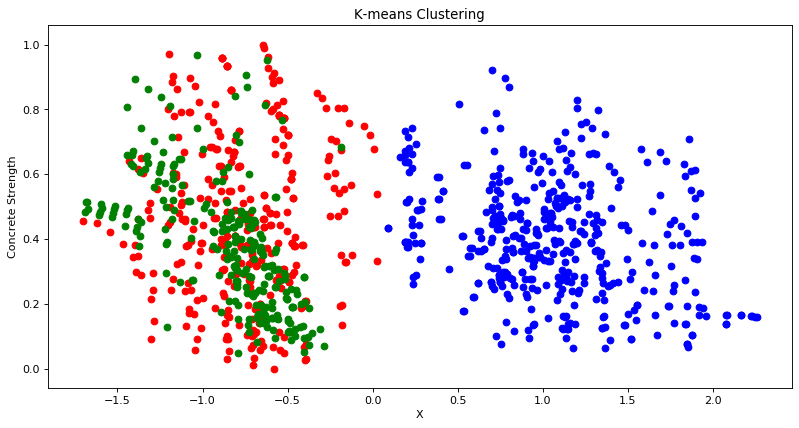

In [59]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["cement"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["cement"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["cement"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Cement Used")
plt.ylabel("Concrete Strength")
plt.show()

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Concrete Strength")
plt.show()

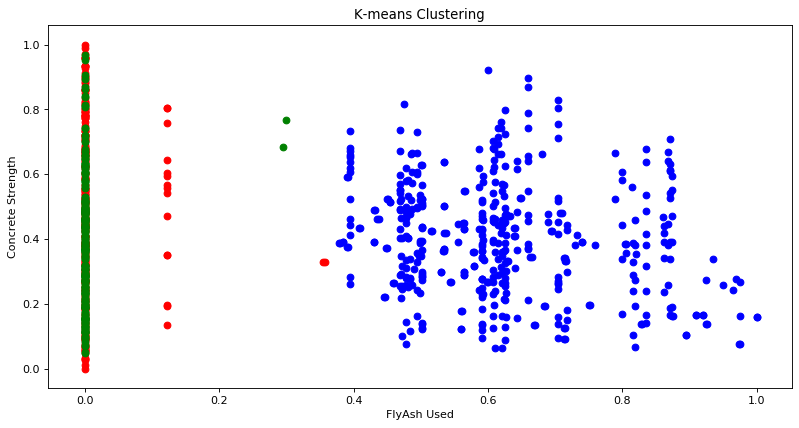

In [60]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["flyash"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["flyash"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["flyash"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("FlyAsh Used")
plt.ylabel("Concrete Strength")
plt.show()

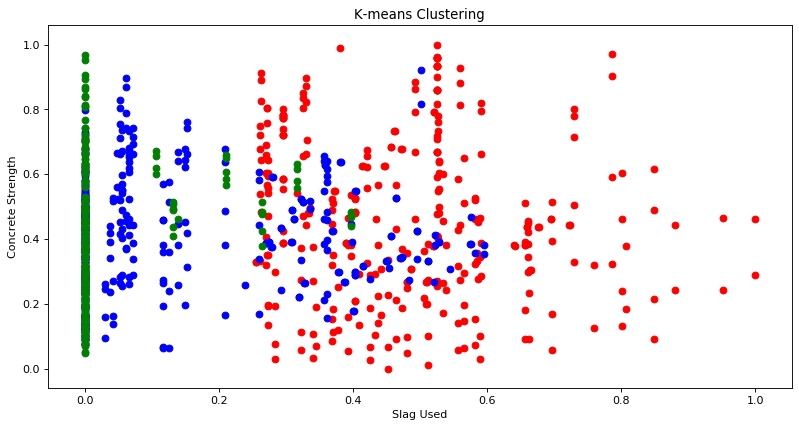

In [61]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["slag"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["slag"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["slag"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Slag Used")
plt.ylabel("Concrete Strength")
plt.show()

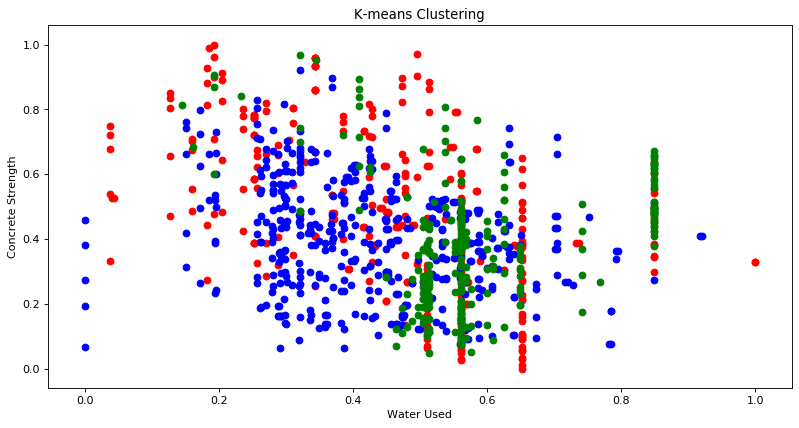

In [62]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["water"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["water"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["water"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Water Used")
plt.ylabel("Concrete Strength")
plt.show()

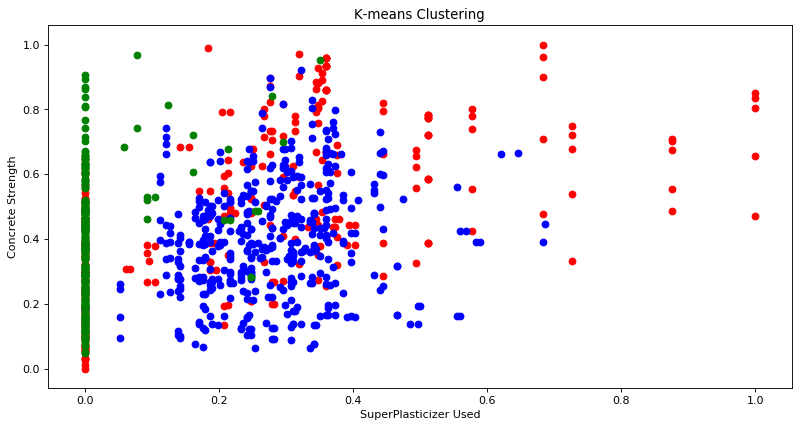

In [63]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["superplasticizer"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["superplasticizer"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["superplasticizer"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("SuperPlasticizer Used")
plt.ylabel("Concrete Strength")
plt.show()

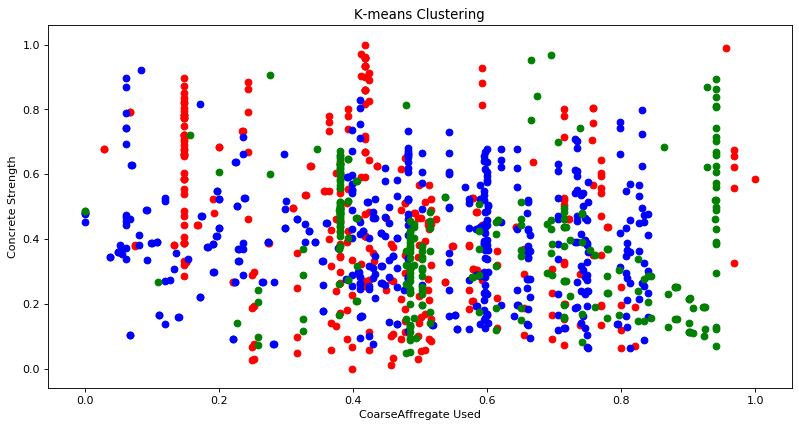

In [64]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["coarseaggregate"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["coarseaggregate"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["coarseaggregate"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("CoarseAffregate Used")
plt.ylabel("Concrete Strength")
plt.show()

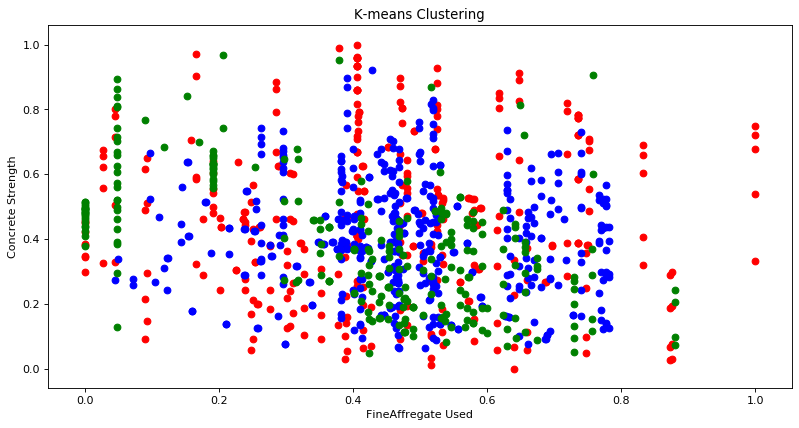

In [65]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["fineaggregate"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["fineaggregate"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["fineaggregate"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("FineAffregate Used")
plt.ylabel("Concrete Strength")
plt.show()

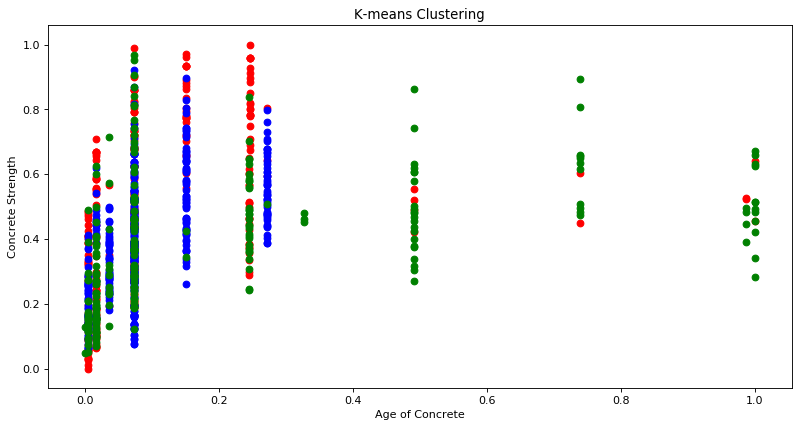

In [66]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_kmeans == 0 ]["age"],df[df.label_kmeans == 0].csMPa,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["age"],df[df.label_kmeans == 1].csMPa,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["age"],df[df.label_kmeans == 2].csMPa,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Age of Concrete")
plt.ylabel("Concrete Strength")
plt.show()

## Hierarchical Clustering

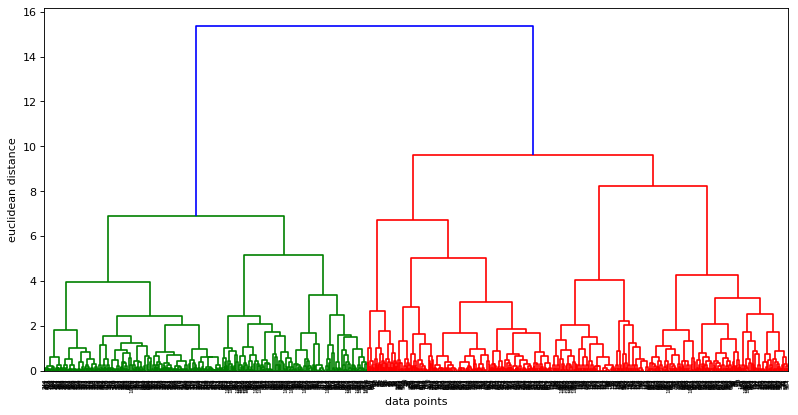

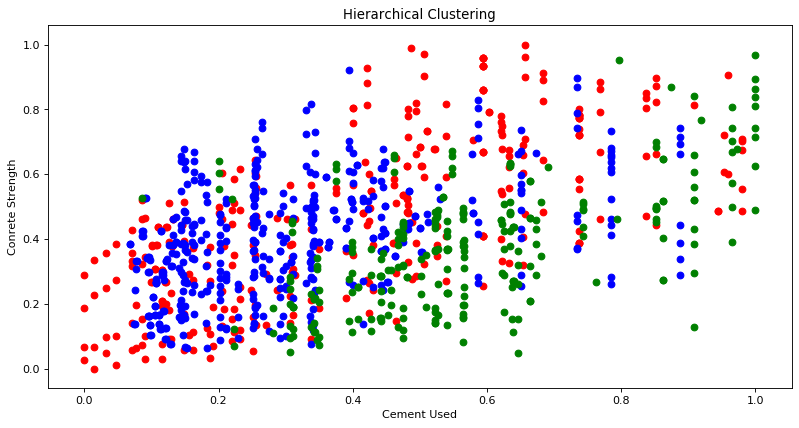

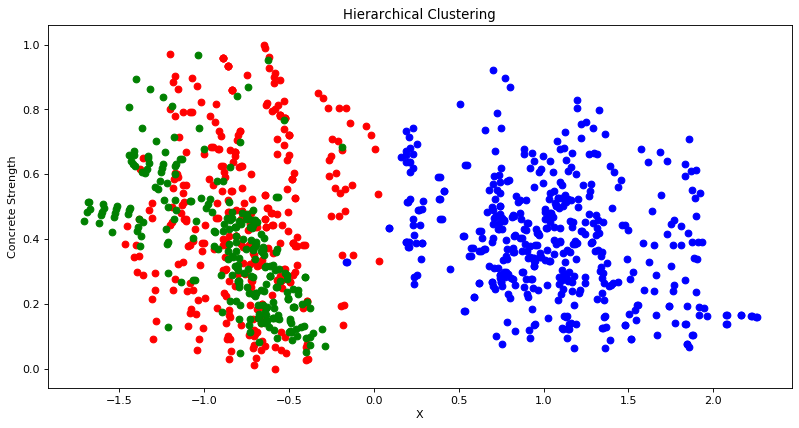

In [67]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(x)

df["label_hiyerartical"] = clusters_hiyerartical

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df[df.label_hiyerartical == 0 ]["cement"],df[df.label_hiyerartical == 0].csMPa,color = "red")
plt.scatter(df[df.label_hiyerartical == 1 ]["cement"],df[df.label_hiyerartical == 1].csMPa,color = "blue")
plt.scatter(df[df.label_hiyerartical == 2 ]["cement"],df[df.label_hiyerartical == 2].csMPa,color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("Cement Used")
plt.ylabel("Conrete Strength")
plt.show()

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data[df.label_hiyerartical == 0 ].x,data.y[df.label_hiyerartical == 0],color = "red")
plt.scatter(data[df.label_hiyerartical == 1 ].x,data.y[df.label_hiyerartical == 1],color = "blue")
plt.scatter(data[df.label_hiyerartical == 2 ].x,data.y[df.label_hiyerartical == 2],color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Concrete Strength")
plt.show()